In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")

In [3]:
files = ['AIRPORTS',
'AREA',
'BUDGET',
'continent',
'CURACCT',
'DEBTFOREIGNERS',
'EDUCATIONSPEND',
'electricconsupmtion',
'emissions',
'EXPORTS',
'fossilelectricity',
'GDP',
'GDPGROWTH',
'GDPPERCAP',
'hydroelectricity',
'IMPORTS',
'INDUSTPRODGR',
'internetusers',
'LIFEXP',
'MARMERCHANT',
'MIGRATION',
'MILIEXPENDITURE',
'naturalgasconsumption',
'nuclearelectricity',
'otherrenewableelectricity',
'petroleumconsumption',
'POPGROWTH',
'POPULATION',
'PUBLICDEBT',
'RAILWAYS',
'ROADWAYS',
'UNEMPLOYMENT',
'WATERWAYS',
'WORKFORCE']

In [4]:
pd_dict = {}
for file in files:
    pd_dict[file] = pd.read_csv('{}.csv'.format(file))

In [5]:
# file.head()
pd_dict['AIRPORTS'].head()

,Unnamed: 0,COUNTRY,AIRPORTS,YEAR
0,1,United States,"13,513",2013
1,2,Brazil,"4,093",2013
2,3,Mexico,"1,714",2013
3,4,Canada,"1,467",2013
4,5,Russia,"1,218",2013


In [7]:
base_df = pd_dict['continent']
area_df = pd_dict['AREA']

In [8]:
base_df = pd_dict['continent']
area_df = pd_dict['AREA']
petrol_df = pd_dict['petroleumconsumption']
users_df = pd_dict['internetusers']
hydro_df = pd_dict['hydroelectricity']
nuclear_df = pd_dict['nuclearelectricity']
otherrenew_df = pd_dict['otherrenewableelectricity']
mili_df = pd_dict['MILIEXPENDITURE']
co2_df = pd_dict['emissions']
mili_df.rename(columns = {'% OF GDP':'mili_exp_%_gdp'}, inplace = True)

In [9]:
for i, row in base_df.iterrows():
    row['country_name'] = row['country_name'].split(",")
    row ['country_name'] = row['country_name'][0]

In [10]:
base_df.rename(columns = {'country_name':'Country'}, inplace = True)
base_df.merge(area_df, on = 'Country', how = 'left')

,continent_name,Country,Index,Area_sqKm
0,Asia,Afghanistan,42.0,"652,230.00"
1,Europe,Albania,145.0,"28,748.00"
2,Antarctica,Antarctica (the territory South of 60 deg S),NaN,NaN
3,Africa,Algeria,11.0,"2,381,740.00"
4,Oceania,American Samoa,216.0,224
...,...,...,...,...
252,Africa,Zambia,40.0,"752,618.00"
253,Oceania,Disputed Territory,NaN,NaN
254,Asia,Iraq-Saudi Arabia Neutral Zone,NaN,NaN
255,Asia,United Nations Neutral Zone,NaN,NaN


In [11]:
mili_df.head()

,Unnamed: 0,COUNTRY,mili_exp_%_gdp,YEAR,Unnamed: 4
0,1,Saudi Arabia,8.78,2018,NaN
1,2,Oman,8.17,2018,NaN
2,3,United Arab Emirates,5.70,2016,NaN
3,4,Algeria,5.27,2018,NaN
4,5,Kuwait,5.06,2018,NaN


In [12]:
base_df.rename(columns = {'country_name':'Country'}, inplace = True)
df1 = base_df.merge(area_df, on = 'Country', how = 'left')

df1.rename(columns = {'Country':'country'}, inplace = True)
df2 = df1.merge(petrol_df, on = 'country', how = 'outer')
df3 = df2.merge(users_df, on = 'country', how = 'outer')
df4 = df3.merge(hydro_df, on = 'country', how = 'outer')
df5 = df4.merge(nuclear_df, on = 'country', how = 'outer')
df6 = df5.merge(otherrenew_df, on = 'country', how = 'outer')
mili_df.rename(columns = {'COUNTRY':'country'}, inplace = True)
df7 = df6.merge(mili_df, on = 'country', how = 'outer')
df8 = df7.merge(co2_df, on = 'country', how = 'outer')

In [13]:
df8.head()

,continent_name,country,Index,Area_sqKm,Unnamed: 0_x,refined_petroleum_consumption_barrels_per_day,year_x,Unnamed: 4_x,Unnamed: 0_y,number_of_internet_users,...,year_y,Unnamed: 4_y,Unnamed: 0_y,mili_exp_%_gdp,YEAR,Unnamed: 4_x,Unnamed: 0,year,carbon_emissions_from_energy_consumption_MT,Unnamed: 4_y
0,Asia,Afghanistan,42.0,"652,230.00",117.0,"35,000",2016.0,est.,NaN,NaN,...,2017.0,est.,116.0,0.99,2018.0,NaN,111.0,2017.0,"9,067,000.00",est.
1,Europe,Albania,145.0,"28,748.00",120.0,"29,000",2016.0,est.,111.0,"2,016,516",...,2017.0,est.,97.0,1.26,2019.0,est.,136.0,2017.0,"4,500,000.00",est.
2,Antarctica,Antarctica (the territory South of 60 deg S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,Algeria,11.0,"2,381,740.00",37.0,"405,000",2016.0,est.,37.0,"17,291,463",...,2017.0,est.,4.0,5.27,2018.0,NaN,34.0,2017.0,"135,900,000.00",est.
4,Oceania,American Samoa,216.0,224,192.0,"2,375",2016.0,est.,206.0,"17,000",...,2017.0,est.,NaN,NaN,NaN,NaN,189.0,2017.0,"361,100.00",est.


In [14]:
final_df = df8[['continent_name','country','Area_sqKm','refined_petroleum_consumption_barrels_per_day','number_of_internet_users', 'hydro_percentage_of_electricity_production','nuclear_percentage_of_electricity_production', 'other_renewable_percentage_of_electricity_production','mili_exp_%_gdp',"carbon_emissions_from_energy_consumption_MT"]].copy(deep=False)
final_df

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
0,Asia,Afghanistan,"652,230.00","35,000",NaN,52.0,0.0,4.0,0.99,"9,067,000.00"
1,Europe,Albania,"28,748.00","29,000","2,016,516",95.0,0.0,0.0,1.26,"4,500,000.00"
2,Antarctica,Antarctica (the territory South of 60 deg S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,Algeria,"2,381,740.00","405,000","17,291,463",1.0,0.0,2.0,5.27,"135,900,000.00"
4,Oceania,American Samoa,224,"2,375","17,000",0.0,0.0,2.0,NaN,"361,100.00"
...,...,...,...,...,...,...,...,...,...,...
276,NaN,"Saint Helena, Ascension, and Tristan da Cunha",NaN,70,"1,800",0.0,0.0,0.0,NaN,"10,650.00"
277,NaN,Gaza Strip,NaN,NaN,"2,673,000",NaN,NaN,NaN,NaN,NaN
278,NaN,"Micronesia, Federated States of",NaN,NaN,"33,000",1.0,0.0,3.0,NaN,105
279,NaN,Antarctica,NaN,NaN,"4,400",NaN,NaN,NaN,NaN,NaN


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 280
Data columns (total 10 columns):
continent_name                                          257 non-null object
country                                                 281 non-null object
Area_sqKm                                               222 non-null object
refined_petroleum_consumption_barrels_per_day           221 non-null object
number_of_internet_users                                232 non-null object
hydro_percentage_of_electricity_production              221 non-null float64
nuclear_percentage_of_electricity_production            221 non-null float64
other_renewable_percentage_of_electricity_production    220 non-null float64
mili_exp_%_gdp                                          164 non-null float64
carbon_emissions_from_energy_consumption_MT             220 non-null object
dtypes: float64(4), object(6)
memory usage: 24.1+ KB


In [16]:
final_df['Area_sqKm'] = final_df['Area_sqKm'].str.replace(',', '')
final_df['refined_petroleum_consumption_barrels_per_day'] = final_df['refined_petroleum_consumption_barrels_per_day'].str.replace(',', '')
final_df['number_of_internet_users'] = final_df['number_of_internet_users'].str.replace(',', '')
final_df['carbon_emissions_from_energy_consumption_MT'] = final_df['carbon_emissions_from_energy_consumption_MT'].str.replace(',', '')


In [17]:
final_df['Area_sqKm'] = final_df['Area_sqKm'].astype(float)
final_df['refined_petroleum_consumption_barrels_per_day'] = final_df['refined_petroleum_consumption_barrels_per_day'].astype(float)
final_df['number_of_internet_users'] = final_df['number_of_internet_users'].astype(float)
final_df['carbon_emissions_from_energy_consumption_MT'] = final_df['carbon_emissions_from_energy_consumption_MT'].astype(float)



In [18]:
final_df = final_df.sort_values(by = ['Area_sqKm'], ascending = False)
final_df.dropna(subset=['continent_name', "Area_sqKm"], inplace = True)
final_df.head(n=50)

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
187,Europe,Russia,17098242.0,3650000.0,108772470.0,21.0,11.0,1.0,3.93,1.847000e+09
37,North America,Canada,9984670.0,2445000.0,31770034.0,56.0,9.0,12.0,1.31,6.406000e+08
243,North America,United States,9833517.0,19960000.0,246809221.0,7.0,9.0,14.0,3.42,5.242000e+09
44,Asia,China,9596960.0,12470000.0,730723960.0,18.0,2.0,18.0,1.87,1.167000e+10
26,South America,Brazil,8515770.0,2956000.0,122841218.0,64.0,1.0,18.0,1.48,5.138000e+08
11,Oceania,Australia,7741220.0,1175000.0,20288409.0,11.0,0.0,17.0,1.89,4.391000e+08
103,Asia,India,3287263.0,4521000.0,374328160.0,12.0,2.0,16.0,2.04,2.383000e+09
10,South America,Argentina,2780400.0,806000.0,30786889.0,24.0,4.0,3.0,0.86,2.037000e+08
114,Asia,Kazakhstan,2724900.0,274000.0,14100751.0,14.0,0.0,1.0,0.95,3.046000e+08
113,Europe,Kazakhstan,2724900.0,274000.0,14100751.0,14.0,0.0,1.0,0.95,3.046000e+08


In [19]:
final_df.sort_values(by=['Area_sqKm'], ascending = False)

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
187,Europe,Russia,17098242.0,3650000.0,108772470.0,21.0,11.0,1.0,3.93,1.847000e+09
37,North America,Canada,9984670.0,2445000.0,31770034.0,56.0,9.0,12.0,1.31,6.406000e+08
243,North America,United States,9833517.0,19960000.0,246809221.0,7.0,9.0,14.0,3.42,5.242000e+09
44,Asia,China,9596960.0,12470000.0,730723960.0,18.0,2.0,18.0,1.87,1.167000e+10
26,South America,Brazil,8515770.0,2956000.0,122841218.0,64.0,1.0,18.0,1.48,5.138000e+08
...,...,...,...,...,...,...,...,...,...,...
47,Asia,Cocos (Keeling) Islands,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,Oceania,Tokelau,12.0,NaN,805.0,NaN,NaN,NaN,NaN,NaN
86,Europe,Gibraltar,6.5,78000.0,27699.0,0.0,0.0,0.0,NaN,1.334000e+07
256,Asia,Spratly Islands,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
final_df.dropna(subset = ['refined_petroleum_consumption_barrels_per_day'], inplace = True)

In [21]:
final_df.isnull().sum()

continent_name                                           0
country                                                  0
Area_sqKm                                                0
refined_petroleum_consumption_barrels_per_day            0
number_of_internet_users                                 4
hydro_percentage_of_electricity_production               0
nuclear_percentage_of_electricity_production             0
other_renewable_percentage_of_electricity_production     0
mili_exp_%_gdp                                          47
carbon_emissions_from_energy_consumption_MT              0
dtype: int64

In [22]:
median_exp = final_df['mili_exp_%_gdp'].median()
armed_countries = ['Syria','Qatar']

In [23]:
rows_to_change = list(final_df[(final_df['mili_exp_%_gdp'].isnull()) &
         (final_df.country.isin(armed_countries))].index)

In [24]:
final_df.loc[rows_to_change,'mili_exp_%_gdp'] = median_exp
final_df[final_df.country.isin(armed_countries)]

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
220,Asia,Syria,187437.0,134000.0,5476850.0,17.0,0.0,0.0,1.49,27510000.0
184,Asia,Qatar,11586.0,277000.0,2129360.0,0.0,0.0,1.0,1.49,114200000.0


In [25]:
final_df['mili_exp_%_gdp'].fillna(0,inplace = True )

In [26]:
nan = final_df[final_df.isna().any(axis=1)]
nan

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
0,Asia,Afghanistan,652230.0,35000.0,NaN,52.0,0.0,4.0,0.99,9067000.0
212,Africa,South Sudan,644329.0,8000.0,NaN,0.0,0.0,1.0,1.33,1224000.0
213,Africa,Western Sahara,266000.0,1700.0,NaN,0.0,0.0,0.0,0.00,268400.0
232,North America,Turks and Caicos Islands,948.0,1420.0,NaN,0.0,0.0,0.0,0.00,221800.0


In [27]:
final_df['number_of_internet_users'].median()

2677502.0

In [28]:
median_int = final_df['number_of_internet_users'].median()
internet_users = ['Afghanistan','South Sudan']

In [29]:
int_rows_to_change = list(final_df[(final_df['number_of_internet_users'].isnull()) &
         (final_df.country.isin(internet_users))].index)

In [30]:
final_df.loc[int_rows_to_change,'number_of_internet_users'] = median_int
final_df[final_df.country.isin(internet_users)]

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
0,Asia,Afghanistan,652230.0,35000.0,2677502.0,52.0,0.0,4.0,0.99,9067000.0
212,Africa,South Sudan,644329.0,8000.0,2677502.0,0.0,0.0,1.0,1.33,1224000.0


In [31]:
final_df['number_of_internet_users'].fillna(0,inplace = True )

In [32]:
final_df.isnull().sum()

continent_name                                          0
country                                                 0
Area_sqKm                                               0
refined_petroleum_consumption_barrels_per_day           0
number_of_internet_users                                0
hydro_percentage_of_electricity_production              0
nuclear_percentage_of_electricity_production            0
other_renewable_percentage_of_electricity_production    0
mili_exp_%_gdp                                          0
carbon_emissions_from_energy_consumption_MT             0
dtype: int64

In [33]:
final_df.head()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT
187,Europe,Russia,17098242.0,3650000.0,108772470.0,21.0,11.0,1.0,3.93,1.847000e+09
37,North America,Canada,9984670.0,2445000.0,31770034.0,56.0,9.0,12.0,1.31,6.406000e+08
243,North America,United States,9833517.0,19960000.0,246809221.0,7.0,9.0,14.0,3.42,5.242000e+09
44,Asia,China,9596960.0,12470000.0,730723960.0,18.0,2.0,18.0,1.87,1.167000e+10
26,South America,Brazil,8515770.0,2956000.0,122841218.0,64.0,1.0,18.0,1.48,5.138000e+08


In [34]:
final_df['renewable_electricity'] = final_df['hydro_percentage_of_electricity_production'] + final_df['nuclear_percentage_of_electricity_production'] + final_df['other_renewable_percentage_of_electricity_production']


In [35]:
continent_df = final_df.pivot_table(index = 'continent_name', values = ['refined_petroleum_consumption_barrels_per_day', 
                                                         'number_of_internet_users','renewable_electricity' 
                                                         ,'carbon_emissions_from_energy_consumption_MT',"mili_exp_%_gdp"], aggfunc = np.mean)



continent_df.reset_index(inplace = True)
continent_df

,continent_name,carbon_emissions_from_energy_consumption_MT,mili_exp_%_gdp,number_of_internet_users,refined_petroleum_consumption_barrels_per_day,renewable_electricity
0,Africa,2.737474e+07,1.433469,5.868278e+06,77448.163265,37.326531
1,Asia,4.665223e+08,2.495556,3.990582e+07,873357.777778,27.955556
2,Europe,1.453049e+08,1.551915,1.392163e+07,415172.765957,49.595745
3,North America,2.112930e+08,0.515161,1.246750e+07,820406.451613,24.225806
4,Oceania,2.920443e+07,0.249412,1.538164e+06,85270.294118,27.588235
5,South America,9.682167e+07,1.488333,2.038169e+07,485791.666667,51.416667


In [36]:
continent_df.columns

Index(['continent_name', 'carbon_emissions_from_energy_consumption_MT',
       'mili_exp_%_gdp', 'number_of_internet_users',
       'refined_petroleum_consumption_barrels_per_day',
       'renewable_electricity'],
      dtype='object')

In [37]:
continent_df
pd.options.display.float_format = '{:,.2f}'.format

print(continent_df)

  continent_name  carbon_emissions_from_energy_consumption_MT  mili_exp_%_gdp  \
0         Africa                                27,374,740.82            1.43   
1           Asia                               466,522,251.11            2.50   
2         Europe                               145,304,857.45            1.55   
3  North America                               211,292,992.90            0.52   
4        Oceania                                29,204,432.47            0.25   
5  South America                                96,821,666.67            1.49   

   number_of_internet_users  refined_petroleum_consumption_barrels_per_day  \
0              5,868,277.86                                      77,448.16   
1             39,905,819.38                                     873,357.78   
2             13,921,629.04                                     415,172.77   
3             12,467,495.10                                     820,406.45   
4              1,538,164.29               

In [38]:
def color_red(value):

    if value >= 100000000 :
        color = 'red'
    elif value < 100000000:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s'% color

In [39]:
continent_df['mili_exp_%_gdp'] = continent_df['mili_exp_%_gdp'].div(100).round(4)
continent_df['renewable_electricity'] = continent_df['renewable_electricity'].div(100).round(4)

cm = sns.light_palette('grey', as_cmap=True)


In [40]:
cdf = continent_df.style.applymap(color_red, subset=['carbon_emissions_from_energy_consumption_MT'])

cdf = continent_df.style.format({'continent_name': str.upper,
                           'carbon_emissions_from_energy_consumption_MT': '{:20,.0f}',"mili_exp_%_gdp":'{:.2%}',
                          "number_of_internet_users":'{:20,.0f}', "refined_petroleum_consumption_barrels_per_day":'{:20,.0f}',"renewable_electricity":'{:.2%}'})

cdf

,continent_name,carbon_emissions_from_energy_consumption_MT,mili_exp_%_gdp,number_of_internet_users,refined_petroleum_consumption_barrels_per_day,renewable_electricity
0,AFRICA,"27,374,741",1.43%,"5,868,278","77,448",37.33%
1,ASIA,"466,522,251",2.50%,"39,905,819","873,358",27.96%
2,EUROPE,"145,304,857",1.55%,"13,921,629","415,173",49.60%
3,NORTH AMERICA,"211,292,993",0.52%,"12,467,495","820,406",24.23%
4,OCEANIA,"29,204,432",0.25%,"1,538,164","85,270",27.59%
5,SOUTH AMERICA,"96,821,667",1.49%,"20,381,686","485,792",51.42%


In [41]:
continent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
continent_name                                   6 non-null object
carbon_emissions_from_energy_consumption_MT      6 non-null float64
mili_exp_%_gdp                                   6 non-null float64
number_of_internet_users                         6 non-null float64
refined_petroleum_consumption_barrels_per_day    6 non-null float64
renewable_electricity                            6 non-null float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


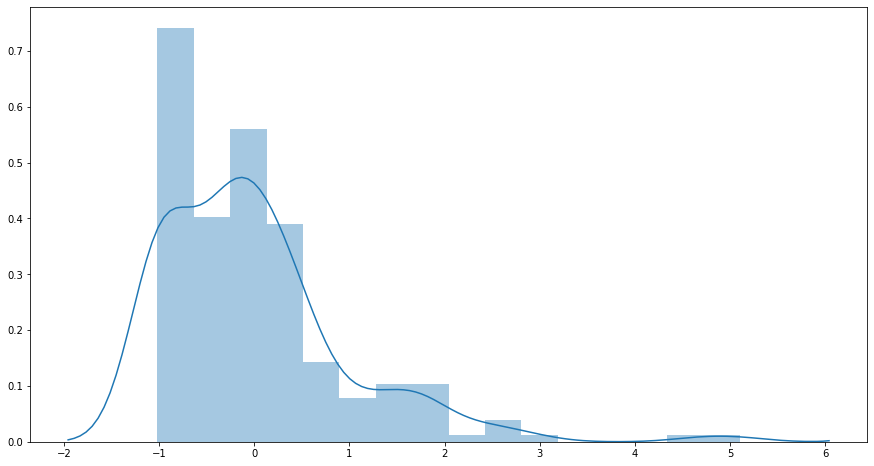

In [42]:
mili_z_score = []
mili_mean = final_df['mili_exp_%_gdp'].mean()
mili_std = final_df['mili_exp_%_gdp'].std()

for i, row in final_df.iterrows():
    mili_z_score.append((row['mili_exp_%_gdp']-mili_mean)/mili_std)

plt.figure(figsize=(15,8))
sns.distplot(mili_z_score)
plt.show()

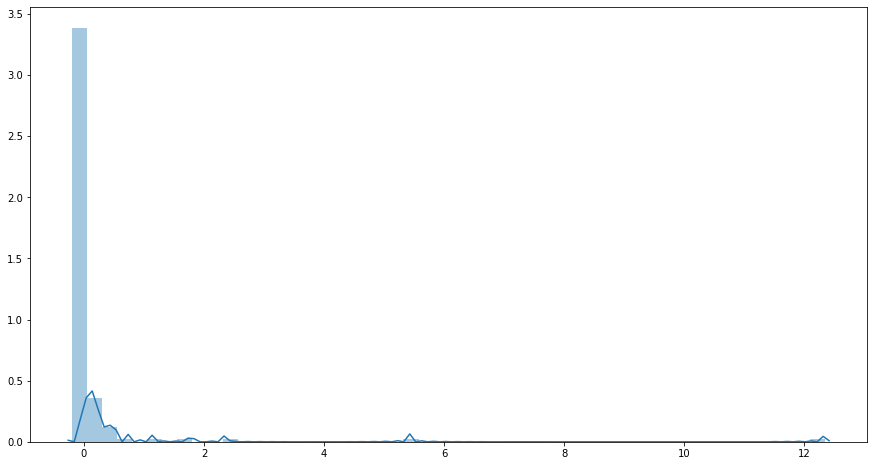

In [43]:
carbon_z_score = []
carbon_mean = final_df['carbon_emissions_from_energy_consumption_MT'].mean()
carbon_std = final_df['carbon_emissions_from_energy_consumption_MT'].std()

for i, row in final_df.iterrows():
    carbon_z_score.append((row['carbon_emissions_from_energy_consumption_MT']-carbon_mean)/carbon_std)

plt.figure(figsize=(15,8))
sns.distplot(carbon_z_score)
plt.show()

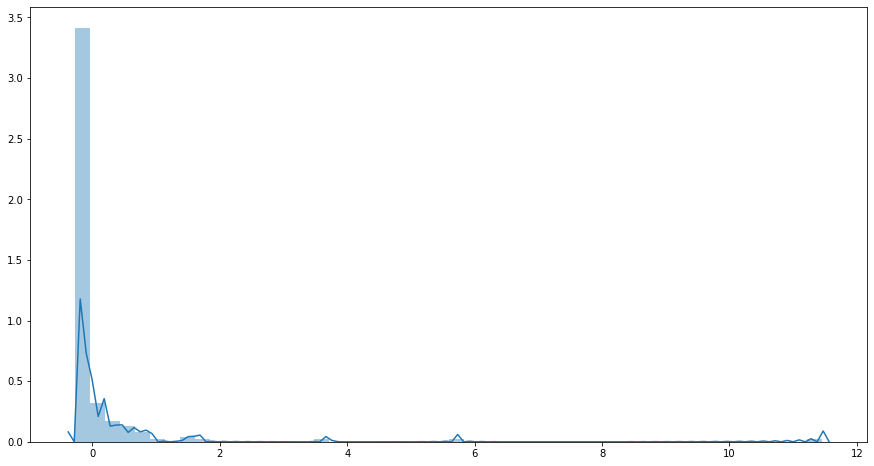

In [44]:
internet_z_score = []
internet_mean = final_df['number_of_internet_users'].mean()
internet_std = final_df['number_of_internet_users'].std()

for i, row in final_df.iterrows():
    internet_z_score.append((row['number_of_internet_users']-internet_mean)/internet_std)

plt.figure(figsize=(15,8))
sns.distplot(internet_z_score)
plt.show()

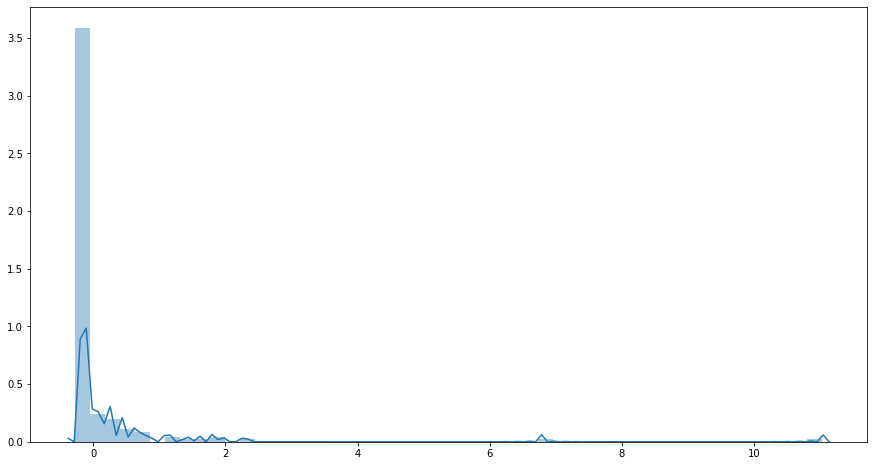

In [45]:
petrol_z_score = []
petrol_mean = final_df['refined_petroleum_consumption_barrels_per_day'].mean()
petrol_std = final_df['refined_petroleum_consumption_barrels_per_day'].std()

for i, row in final_df.iterrows():
    petrol_z_score.append((row['refined_petroleum_consumption_barrels_per_day']-petrol_mean)/petrol_std)

plt.figure(figsize=(15,8))
sns.distplot(petrol_z_score)
plt.show()

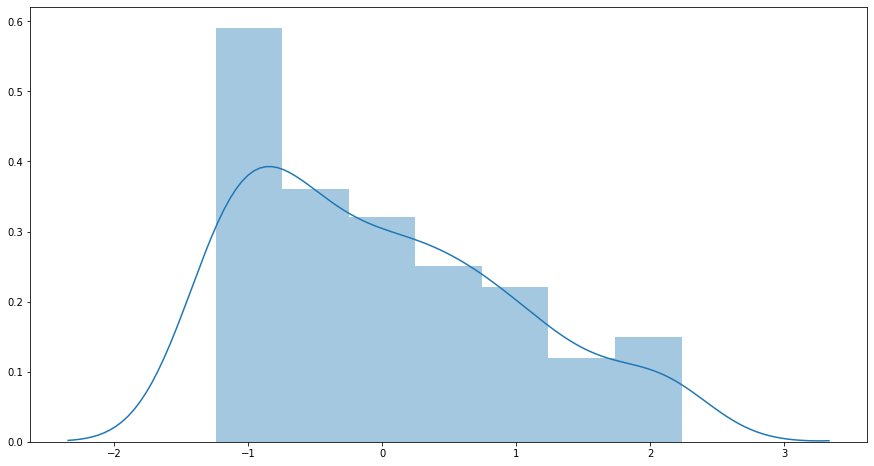

In [46]:
renewables_z_score = []
renewables_mean = final_df['renewable_electricity'].mean()
renewables_std = final_df['renewable_electricity'].std()

for i, row in final_df.iterrows():
    renewables_z_score.append((row['renewable_electricity']-renewables_mean)/renewables_std)

plt.figure(figsize=(15,8))
sns.distplot(renewables_z_score)
plt.show()

In [47]:
final_df['mili_exp_%_gdp'] = final_df['mili_exp_%_gdp'].add(1).round(6) * 100
final_df['renewable_electricity'] = final_df['renewable_electricity'].add(1).round(6) * 100

In [48]:
final_df.head()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,renewable_electricity
187,Europe,Russia,"17,098,242.00","3,650,000.00","108,772,470.00",21.00,11.00,1.00,493.00,"1,847,000,000.00","3,400.00"
37,North America,Canada,"9,984,670.00","2,445,000.00","31,770,034.00",56.00,9.00,12.00,231.00,"640,600,000.00","7,800.00"
243,North America,United States,"9,833,517.00","19,960,000.00","246,809,221.00",7.00,9.00,14.00,442.00,"5,242,000,000.00","3,100.00"
44,Asia,China,"9,596,960.00","12,470,000.00","730,723,960.00",18.00,2.00,18.00,287.00,"11,670,000,000.00","3,900.00"
26,South America,Brazil,"8,515,770.00","2,956,000.00","122,841,218.00",64.00,1.00,18.00,248.00,"513,800,000.00","8,400.00"


In [49]:
final_df['mili_log'] = np.log10(final_df['mili_exp_%_gdp'])
final_df['co2_log'] = np.log10(final_df['carbon_emissions_from_energy_consumption_MT'])
final_df['renew_log'] = np.log10(final_df['renewable_electricity'])
final_df['area_log'] = np.log10(final_df['Area_sqKm'])
final_df['petrol_log'] = np.log10(final_df['refined_petroleum_consumption_barrels_per_day'])
final_df['int_log'] = np.log10(final_df['number_of_internet_users'])

log_df = final_df[["continent_name","country","mili_log", "co2_log","renew_log","area_log", "petrol_log","int_log"]].copy()


In [50]:
log_df.sort_values('renew_log', ascending = False)

,continent_name,country,mili_log,co2_log,renew_log,area_log,petrol_log,int_log
122,Africa,Lesotho,2.45,5.85,4.01,4.48,3.70,5.73
175,South America,Paraguay,2.29,6.89,4.00,5.61,4.63,6.55
182,Asia,Timor-Leste,2.21,5.73,4.00,4.17,3.54,5.50
131,Africa,Malawi,2.27,6.03,4.00,5.07,3.78,6.25
21,Asia,Bhutan,2.00,5.78,4.00,4.58,3.48,5.50
...,...,...,...,...,...,...,...,...
31,Asia,Brunei,2.53,7.00,2.00,3.76,4.26,5.61
226,North America,Trinidad and Tobago,2.25,7.69,2.00,3.71,4.71,5.93
100,Asia,Hong Kong,2.00,8.01,2.00,3.04,5.61,6.78
232,North America,Turks and Caicos Islands,2.00,5.35,2.00,2.98,3.15,-inf


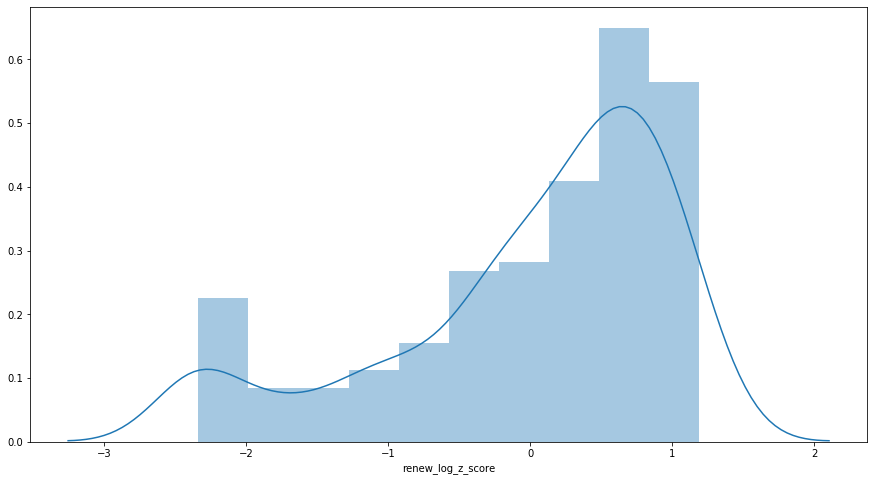

In [51]:
renewables_log_mean = log_df['renew_log'].mean()
renewables_log_std = log_df['renew_log'].std()

log_df['renew_log_z_score'] = (log_df['renew_log']-renewables_log_mean)/renewables_log_std

plt.figure(figsize=(15,8))
sns.distplot(log_df['renew_log_z_score'])
plt.show()

In [52]:
log_df.head()

,continent_name,country,mili_log,co2_log,renew_log,area_log,petrol_log,int_log,renew_log_z_score
187,Europe,Russia,2.69,9.27,3.53,7.23,6.56,8.04,0.35
37,North America,Canada,2.36,8.81,3.89,7.00,6.39,7.50,0.98
243,North America,United States,2.65,9.72,3.49,6.99,7.30,8.39,0.28
44,Asia,China,2.46,10.07,3.59,6.98,7.10,8.86,0.45
26,South America,Brazil,2.39,8.71,3.92,6.93,6.47,8.09,1.04


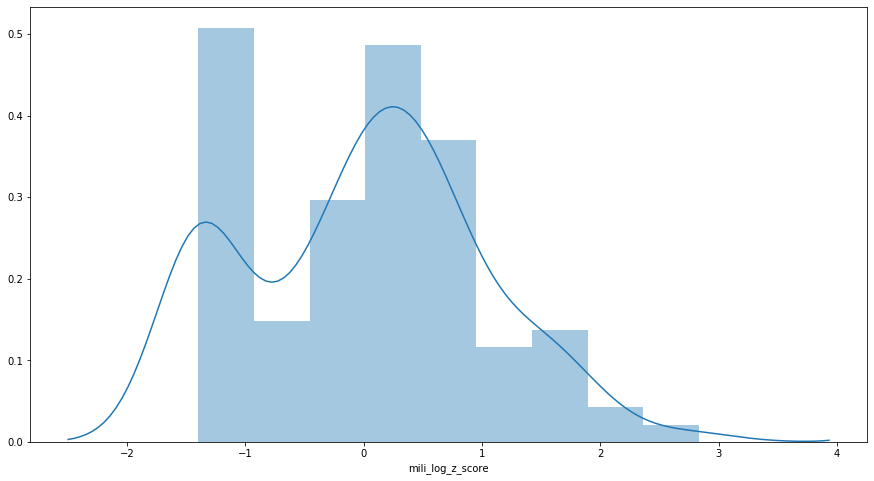

In [53]:
mili_log_mean = log_df['mili_log'].mean()
mili_log_std = log_df['mili_log'].std()

log_df['mili_log_z_score'] = (log_df['mili_log']-mili_log_mean)/mili_log_std

plt.figure(figsize=(15,8))
sns.distplot(log_df['mili_log_z_score'])
plt.show()

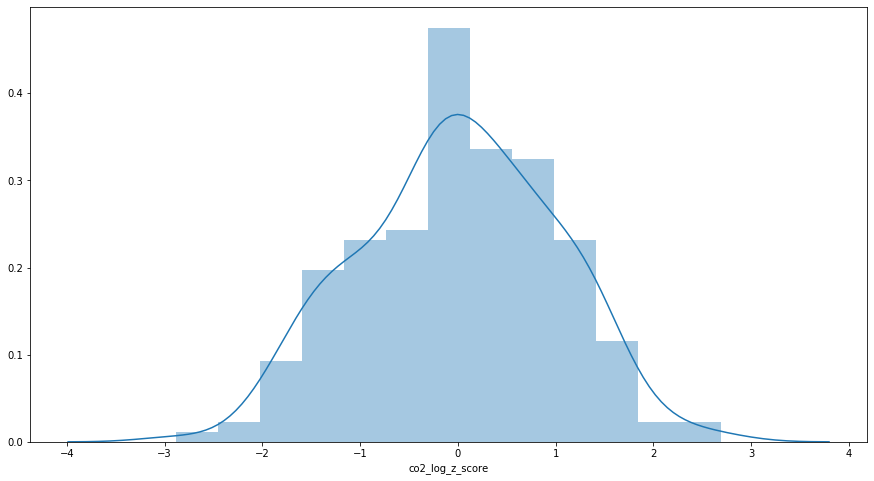

In [54]:
carbon_log_mean = log_df['co2_log'].mean()
carbon_log_std = log_df['co2_log'].std()

log_df['co2_log_z_score'] = (log_df['co2_log']-carbon_log_mean)/carbon_log_std

plt.figure(figsize=(15,8))
sns.distplot(log_df['co2_log_z_score'])
plt.show()

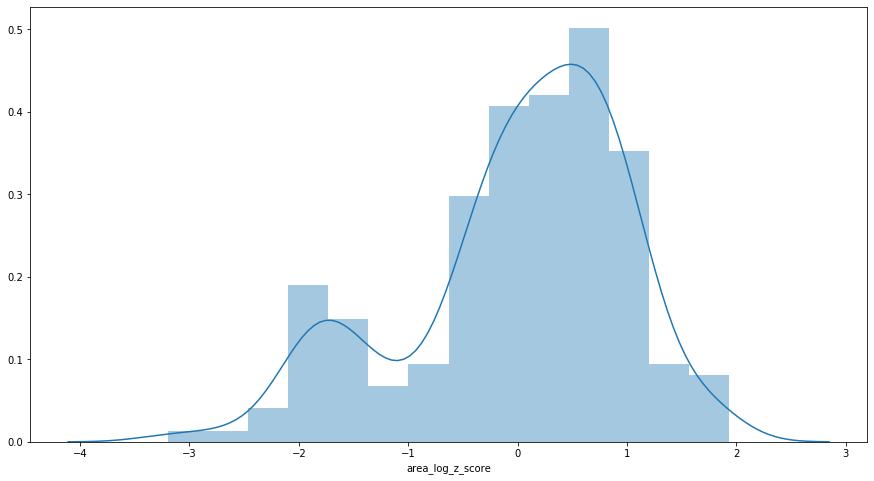

In [55]:
area_log_mean = log_df['area_log'].mean()
area_log_std = log_df['area_log'].std()

log_df['area_log_z_score'] = (log_df['area_log']-area_log_mean)/area_log_std

plt.figure(figsize=(15,8))
sns.distplot(log_df['area_log_z_score'])
plt.show()

In [56]:
log_df.head(50)

,continent_name,country,mili_log,co2_log,renew_log,area_log,petrol_log,int_log,renew_log_z_score,mili_log_z_score,co2_log_z_score,area_log_z_score
187,Europe,Russia,2.69,9.27,3.53,7.23,6.56,8.04,0.35,1.56,1.98,1.94
37,North America,Canada,2.36,8.81,3.89,7.00,6.39,7.50,0.98,0.15,1.56,1.75
243,North America,United States,2.65,9.72,3.49,6.99,7.30,8.39,0.28,1.36,2.38,1.74
44,Asia,China,2.46,10.07,3.59,6.98,7.10,8.86,0.45,0.56,2.70,1.74
26,South America,Brazil,2.39,8.71,3.92,6.93,6.47,8.09,1.04,0.29,1.48,1.69
11,Oceania,Australia,2.46,8.64,3.46,6.89,6.07,7.31,0.23,0.57,1.41,1.66
103,Asia,India,2.48,9.38,3.49,6.52,6.66,8.57,0.28,0.66,2.08,1.36
10,South America,Argentina,2.27,8.31,3.51,6.44,5.91,7.49,0.30,-0.25,1.11,1.31
114,Asia,Kazakhstan,2.29,8.48,3.20,6.44,5.44,7.15,-0.23,-0.16,1.27,1.30
113,Europe,Kazakhstan,2.29,8.48,3.20,6.44,5.44,7.15,-0.23,-0.16,1.27,1.30


In [58]:
log_df.continent_name.nunique()

6

In [59]:
log_df.shape

(201, 12)

In [60]:
final_df_rename = final_df.copy()
final_df_rename.columns = ['continent_name', 'country', 'Area_sqKm',
       'refined_petroleum_consumption_barrels_per_day',
       'number_of_internet_users',
       'hydro_percentage_of_electricity_production',
       'nuclear_percentage_of_electricity_production',
       'other_renewable_percentage_of_electricity_production',
       'mili_exp', 'carbon_emissions_from_energy_consumption_MT',
       'renewable_electricity', 'mili_log', 'co2_log', 'renew_log', 'area_log',
       'petrol_log', 'int_log']

In [61]:
final_df.isnull()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,renewable_electricity,mili_log,co2_log,renew_log,area_log,petrol_log,int_log
187,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
final_df.head()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,renewable_electricity,mili_log,co2_log,renew_log,area_log,petrol_log,int_log
187,Europe,Russia,"17,098,242.00","3,650,000.00","108,772,470.00",21.00,11.00,1.00,493.00,"1,847,000,000.00","3,400.00",2.69,9.27,3.53,7.23,6.56,8.04
37,North America,Canada,"9,984,670.00","2,445,000.00","31,770,034.00",56.00,9.00,12.00,231.00,"640,600,000.00","7,800.00",2.36,8.81,3.89,7.00,6.39,7.50
243,North America,United States,"9,833,517.00","19,960,000.00","246,809,221.00",7.00,9.00,14.00,442.00,"5,242,000,000.00","3,100.00",2.65,9.72,3.49,6.99,7.30,8.39
44,Asia,China,"9,596,960.00","12,470,000.00","730,723,960.00",18.00,2.00,18.00,287.00,"11,670,000,000.00","3,900.00",2.46,10.07,3.59,6.98,7.10,8.86
26,South America,Brazil,"8,515,770.00","2,956,000.00","122,841,218.00",64.00,1.00,18.00,248.00,"513,800,000.00","8,400.00",2.39,8.71,3.92,6.93,6.47,8.09


In [63]:
lm = ols('co2_log ~ C(continent_name) + mili_log + renew_log + petrol_log', data=final_df_rename).fit()
table = sm.stats.anova_lm(lm, typ = 2)
print(table)

# + mili_log + renew_log + petrol_log

                   sum_sq     df        F  PR(>F)
C(continent_name)    1.36   5.00     6.15    0.00
mili_log             0.06   1.00     1.31    0.25
renew_log            0.07   1.00     1.48    0.23
petrol_log         127.24   1.00 2,883.13    0.00
Residual             8.47 192.00      nan     nan


In [64]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov=aov[cols]
    return aov
anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(continent_name),1.36,5.00,0.27,6.15,0.00,0.01,0.01
mili_log,0.06,1.00,0.06,1.31,0.25,0.00,0.00
renew_log,0.07,1.00,0.07,1.48,0.23,0.00,0.00
petrol_log,127.24,1.00,127.24,"2,883.13",0.00,0.93,0.93
Residual,8.47,192.00,0.04,nan,nan,nan,nan


In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp